# Predicting Income using the Adult Data Set


#### Overview

The Adult Data Set, available in the UCI Machine Learning Repository, provides a comprehensive collection of demographic and socioeconomic attributes of individuals. The dataset contains information such as age, education level, occupation, marital status, and more. This project aims to leverage the Adult Data Set to develop a predictive model that can estimate an individual's income level based on these attributes.



#### Objectives

The primary objective of this project is to build a machine learning model capable of accurately predicting whether an individual's income exceeds a certain threshold (e.g., $50,000 per year). By analyzing the various features available in the dataset, we can uncover patterns and relationships that contribute to income levels. This predictive model can be valuable in understanding the factors that influence income and in identifying potential strategies for improving financial outcomes.



#### Methodology

The project will follow a typical machine learning pipeline, consisting of several key steps:

Data Preprocessing: This involves loading the Adult Data Set, handling missing values, dealing with categorical variables, and performing any necessary data transformations.

Exploratory Data Analysis (EDA): In this phase, we will explore the dataset to gain insights into the distributions, correlations, and relationships between variables. Visualizations and statistical summaries will be used to uncover patterns and understand the data better.

Feature Engineering: This step focuses on creating new features or transforming existing ones to enhance the predictive power of the model. Feature engineering techniques may include one-hot encoding, feature scaling, or creating derived features.

Model Development: I will train and evaluate various machine learning algorithms such as logistic regression to predict income levels. The models will be trained using a portion of the dataset and evaluated using appropriate performance metrics.

Model Evaluation and Hyperparameter Tuning: The selected models will be evaluated using suitable evaluation metrics, such as accuracy, precision, recall, and F1 score. We will perform hyperparameter tuning to optimize the models and select the best-performing one.

Model Deployment: Once the final model is selected, it will be deployed and used to make predictions on new, unseen data. We will assess its performance and discuss the implications and potential use cases of the predictive model.

I also bullied a machine learning application so that users can make their own predictions.

In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings
warnings.filterwarnings('ignore')
from itertools import combinations
import scipy.stats
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score

In [74]:
data = pd.read_csv('C:\\Users\\Galaxy Computers\\Desktop\\adult.data',header=None)

In [75]:
data
column_names = ["age", "workclass", "fnlwgt", "education", "education_num", 
                "marital_status", "occupation", "relationship", "race", 
                "sex", "capital_gain", "capital_loss", "hours_per_week", 
                "native_country", "income"]

data.columns = column_names
data

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [76]:
data.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [77]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

In [78]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [79]:
data.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [80]:
data.head(2)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K


In [81]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [82]:
categorical_columns = ["workclass", "education", "marital_status","occupation", 
                       "relationship", "race","sex","native_country", "income"]


In [83]:
for col in categorical_columns:
    data[col + "_encoded"] = label_encoder.fit_transform(data[col])
    
data.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,...,income,workclass_encoded,education_encoded,marital_status_encoded,occupation_encoded,relationship_encoded,race_encoded,sex_encoded,native_country_encoded,income_encoded
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,...,<=50K,7,9,4,1,1,4,1,39,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,...,<=50K,6,9,2,4,0,4,1,39,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,...,<=50K,4,11,0,6,1,4,1,39,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,...,<=50K,4,1,2,6,0,2,1,39,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,...,<=50K,4,9,2,10,5,2,0,5,0


In [84]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income', 'workclass_encoded', 'education_encoded',
       'marital_status_encoded', 'occupation_encoded', 'relationship_encoded',
       'race_encoded', 'sex_encoded', 'native_country_encoded',
       'income_encoded'],
      dtype='object')

In [85]:
df = data[["income_encoded", "native_country_encoded","sex_encoded","race_encoded",
           "occupation_encoded","education_encoded","workclass_encoded","age","fnlwgt","capital_gain"]];df.head()

,income_encoded,native_country_encoded,sex_encoded,race_encoded,occupation_encoded,education_encoded,workclass_encoded,age,fnlwgt,capital_gain
0,0,39,1,4,1,9,7,39,77516,2174
1,0,39,1,4,4,9,6,50,83311,0
2,0,39,1,4,6,11,4,38,215646,0
3,0,39,1,2,6,1,4,53,234721,0
4,0,5,0,2,10,9,4,28,338409,0


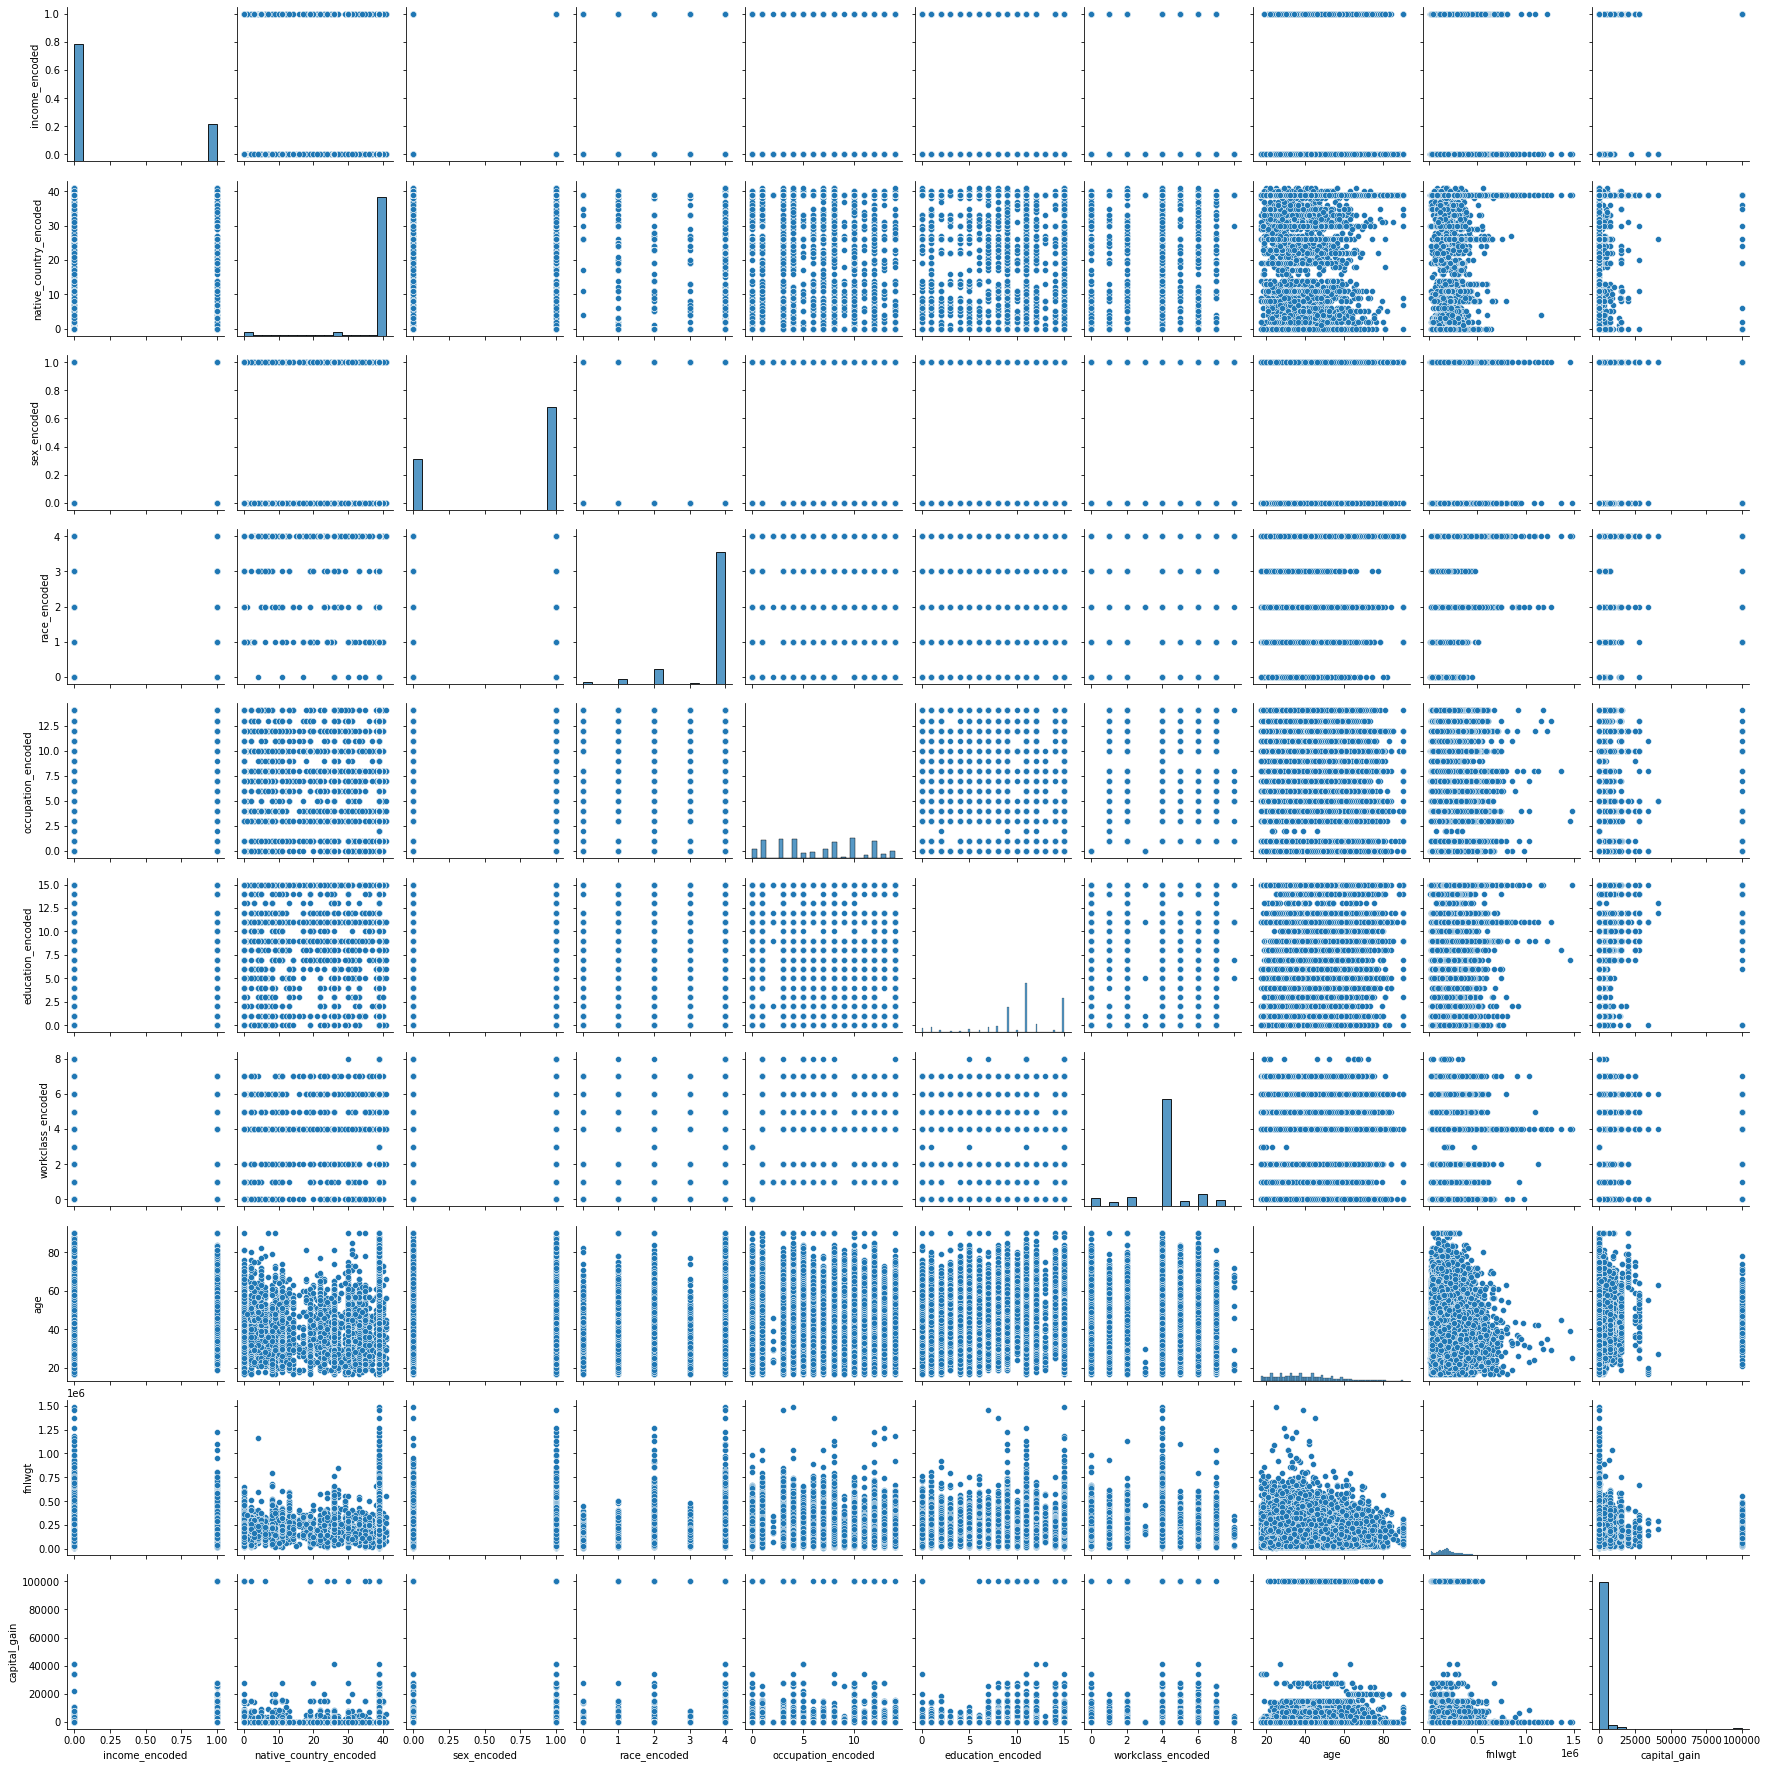

In [86]:
sns.pairplot(df)

In [87]:
df.groupby("income_encoded").mean()

,native_country_encoded,sex_encoded,race_encoded,occupation_encoded,education_encoded,workclass_encoded,age,fnlwgt,capital_gain
income_encoded,,,,,,,,,
0,36.649070,0.611974,3.631513,6.393002,10.125324,3.826578,36.783738,190340.86517,148.752468
1,36.938911,0.849637,3.774136,7.139395,10.843260,4.002296,44.249841,188005.00000,4006.142456


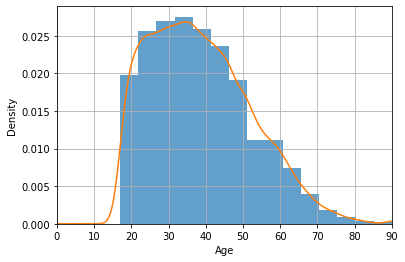

In [88]:
ax = df['age'].hist(bins=15, density=True, stacked=True, alpha=0.7)

df['age'].plot(kind='density')

ax.set(xlabel='Age')
plt.xlim(0, 90)
plt.grid()
plt.show()

In [89]:
df.head()

,income_encoded,native_country_encoded,sex_encoded,race_encoded,occupation_encoded,education_encoded,workclass_encoded,age,fnlwgt,capital_gain
0,0,39,1,4,1,9,7,39,77516,2174
1,0,39,1,4,4,9,6,50,83311,0
2,0,39,1,4,6,11,4,38,215646,0
3,0,39,1,2,6,1,4,53,234721,0
4,0,5,0,2,10,9,4,28,338409,0


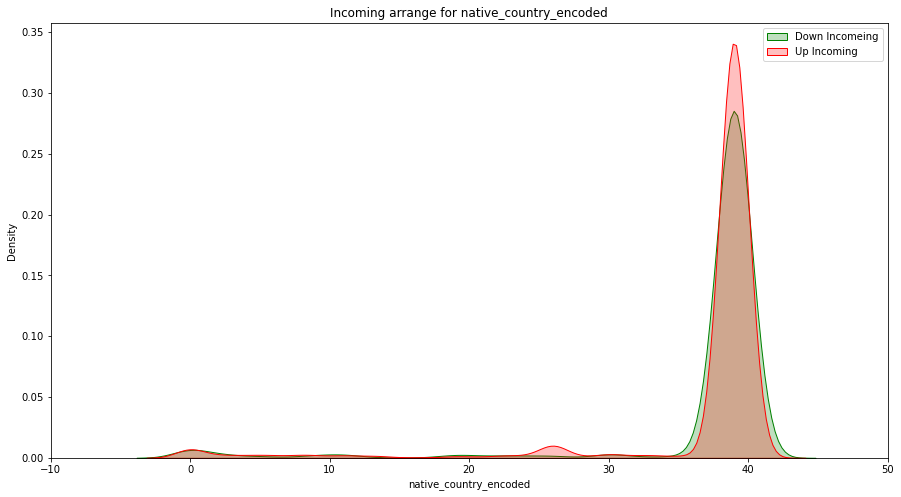

In [90]:
plt.figure(figsize=(15,8))

ax = sns.kdeplot(df["native_country_encoded"][df.income_encoded == 1], color="green", shade=True)

sns.kdeplot(df["native_country_encoded"][df.income_encoded == 0], color="red", shade=True)

plt.legend(['Down Incomeing', "Up Incoming"])
plt.title('Incoming arrange for native_country_encoded')
ax.set(xlabel='native_country_encoded')
plt.xlim(-10,50)
plt.show()

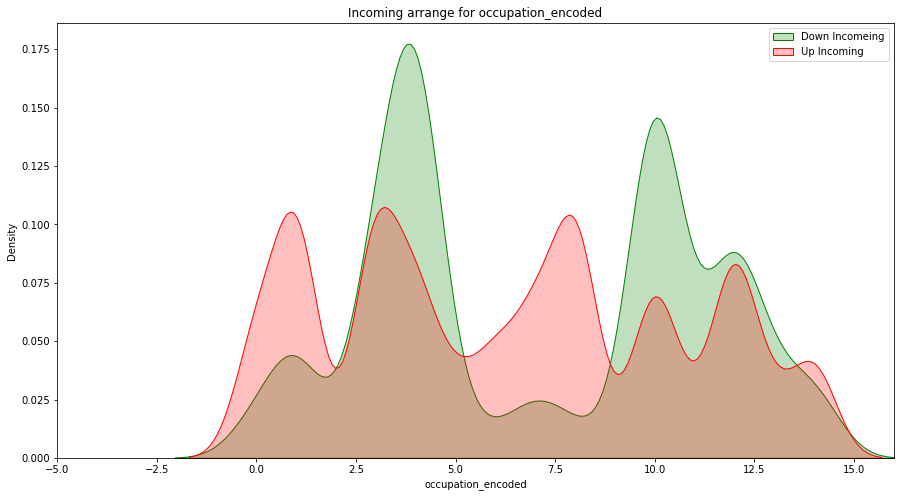

In [91]:
plt.figure(figsize=(15,8))

ax = sns.kdeplot(df["occupation_encoded"][df.income_encoded == 1], color="green", shade=True)

sns.kdeplot(df["occupation_encoded"][df.income_encoded == 0], color="red", shade=True)

plt.legend(['Down Incomeing', "Up Incoming"])
plt.title('Incoming arrange for occupation_encoded')
ax.set(xlabel='occupation_encoded')
plt.xlim(-5,16)
plt.show()

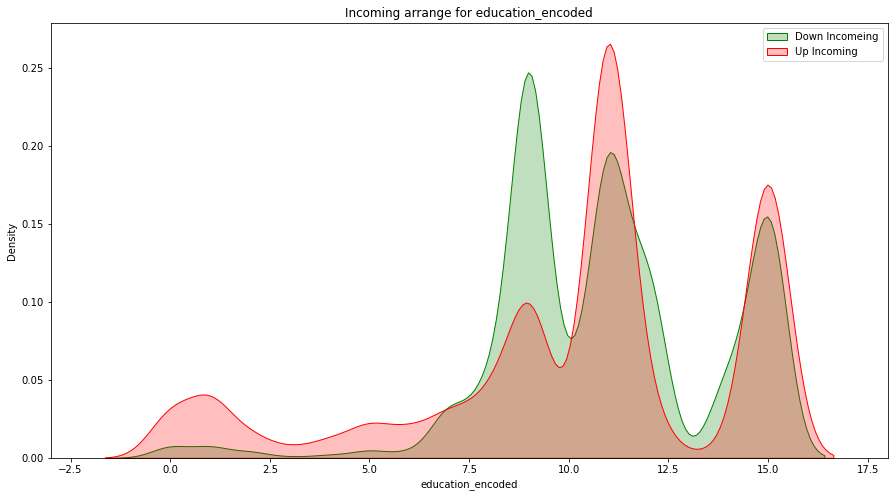

In [92]:
plt.figure(figsize=(15,8))

ax = sns.kdeplot(df["education_encoded"][df.income_encoded == 1], color="green", shade=True)

sns.kdeplot(df["education_encoded"][df.income_encoded == 0], color="red", shade=True)

plt.legend(['Down Incomeing', "Up Incoming"])
plt.title('Incoming arrange for education_encoded')
ax.set(xlabel='education_encoded')
plt.xlim(-3,18)
plt.show()

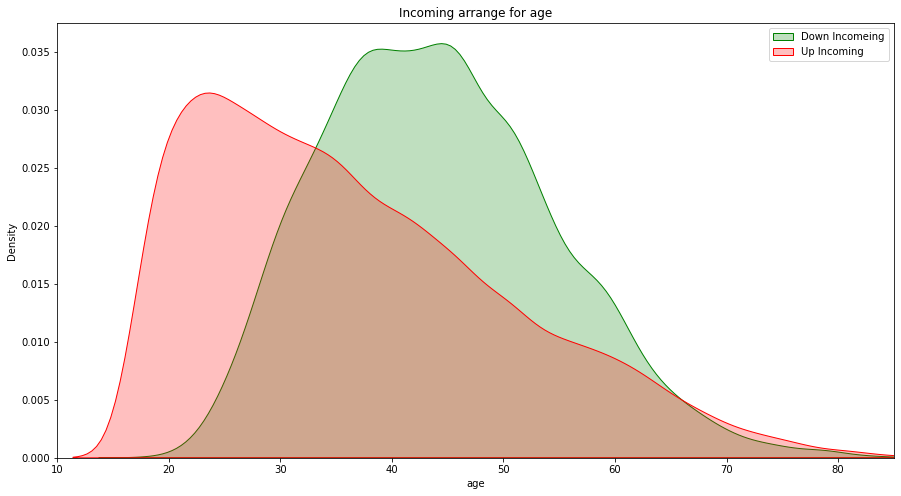

In [93]:
plt.figure(figsize=(15,8))

ax = sns.kdeplot(df["age"][df.income_encoded == 1], color="green", shade=True)

sns.kdeplot(df["age"][df.income_encoded == 0], color="red", shade=True)

plt.legend(['Down Incomeing', "Up Incoming"])
plt.title('Incoming arrange for age')
ax.set(xlabel='age')
plt.xlim(10,85)
plt.show()

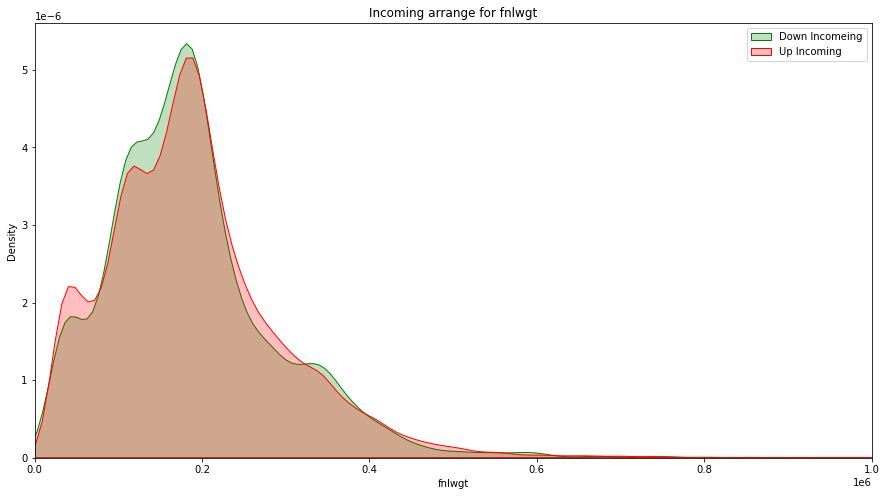

In [94]:
plt.figure(figsize=(15,8))

ax = sns.kdeplot(df["fnlwgt"][df.income_encoded == 1], color="green", shade=True)

sns.kdeplot(df["fnlwgt"][df.income_encoded == 0], color="red", shade=True)

plt.legend(['Down Incomeing', "Up Incoming"])
plt.title('Incoming arrange for fnlwgt')
ax.set(xlabel='fnlwgt')
plt.xlim(-3,1000000)
plt.show()

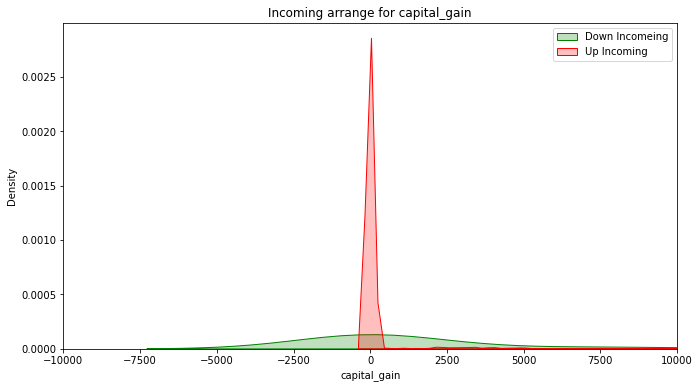

In [95]:
plt.figure(figsize=(11,6))

ax = sns.kdeplot(df["capital_gain"][df.income_encoded == 1], color="green", shade=True)

sns.kdeplot(df["capital_gain"][df.income_encoded == 0], color="red", shade=True)

plt.legend(['Down Incomeing', "Up Incoming"])
plt.title('Incoming arrange for capital_gain')
ax.set(xlabel='capital_gain')
plt.xlim(-10000,10000)
plt.show()

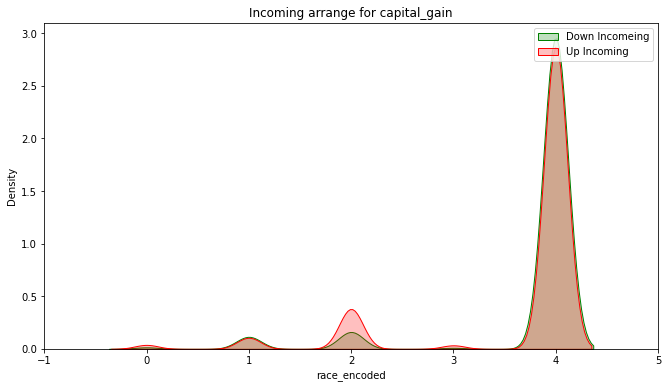

In [96]:
plt.figure(figsize=(11,6))

ax = sns.kdeplot(df["race_encoded"][df.income_encoded == 1], color="green", shade=True)

sns.kdeplot(df["race_encoded"][df.income_encoded == 0], color="red", shade=True)

plt.legend(['Down Incomeing', "Up Incoming"])
plt.title('Incoming arrange for capital_gain')
ax.set(xlabel='race_encoded')
plt.xlim(-1,5)
plt.show()

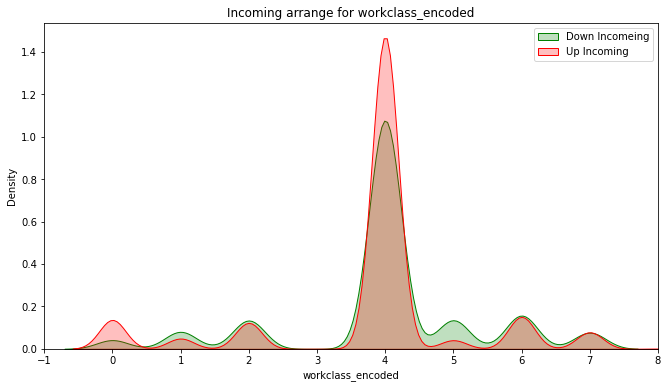

In [97]:
plt.figure(figsize=(11,6))

ax = sns.kdeplot(df["workclass_encoded"][df.income_encoded == 1], color="green", shade=True)

sns.kdeplot(df["workclass_encoded"][df.income_encoded == 0], color="red", shade=True)

plt.legend(['Down Incomeing', "Up Incoming"])
plt.title('Incoming arrange for workclass_encoded')
ax.set(xlabel='workclass_encoded')
plt.xlim(-1,8)
plt.show()

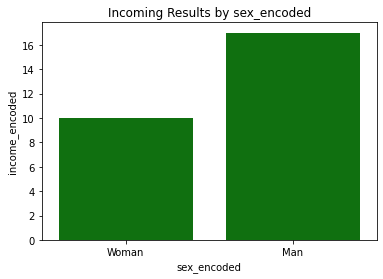

In [98]:
sex_labels = ['Woman', 'Man']
gender = {'sex_encoded': [1, 2],
        'income_encoded': [10, 17]}

sns.barplot('sex_encoded', 'income_encoded', data=gender, color="green")
plt.xticks([0, 1], sex_labels) 
plt.xlabel('sex_encoded')
plt.ylabel('income_encoded')
plt.title('Incoming Results by sex_encoded')
plt.show()


In [99]:
cols = df.columns

cols

Index(['income_encoded', 'native_country_encoded', 'sex_encoded',
       'race_encoded', 'occupation_encoded', 'education_encoded',
       'workclass_encoded', 'age', 'fnlwgt', 'capital_gain'],
      dtype='object')

In [100]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df = scaler.fit_transform(df)

In [101]:
type(df)

numpy.ndarray

In [102]:
df = pd.DataFrame(df, columns=[cols])

In [103]:
y = df['income_encoded']

In [104]:
x = df[["native_country_encoded","occupation_encoded","education_encoded","age","capital_gain","sex_encoded"]]

In [105]:
df.head()

,income_encoded,native_country_encoded,sex_encoded,race_encoded,occupation_encoded,education_encoded,workclass_encoded,age,fnlwgt,capital_gain
0,0.0,0.951220,1.0,1.0,0.071429,0.600000,0.875,0.301370,0.044302,0.02174
1,0.0,0.951220,1.0,1.0,0.285714,0.600000,0.750,0.452055,0.048238,0.00000
2,0.0,0.951220,1.0,1.0,0.428571,0.733333,0.500,0.287671,0.138113,0.00000
3,0.0,0.951220,1.0,0.5,0.428571,0.066667,0.500,0.493151,0.151068,0.00000
4,0.0,0.121951,0.0,0.5,0.714286,0.600000,0.500,0.150685,0.221488,0.00000


In [106]:
from sklearn.model_selection import train_test_split

In [107]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [108]:
from sklearn.linear_model import LogisticRegression

In [109]:
logreg = LogisticRegression(solver='liblinear', random_state=0)

In [110]:
logreg.fit(X_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [111]:
y_pred = logreg.predict(X_test)

y_pred

array([0., 0., 0., ..., 0., 0., 0.])

In [112]:
logreg.predict_proba(X_test)[:,0]

array([0.67189308, 0.90743204, 0.78374883, ..., 0.5077001 , 0.76673996,
       0.7800927 ])

In [113]:
logreg.predict_proba(X_test)[:,1]

array([0.32810692, 0.09256796, 0.21625117, ..., 0.4922999 , 0.23326004,
       0.2199073 ])

### Cross Validation

In [114]:
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [115]:
kf

StratifiedKFold(n_splits=5, random_state=42, shuffle=True)

In [116]:
cnt = 1

for train_index, test_index in kf.split(x, y):
    print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    cnt+=1

Fold:1, Train set: 26048, Test set:6513
Fold:2, Train set: 26049, Test set:6512
Fold:3, Train set: 26049, Test set:6512
Fold:4, Train set: 26049, Test set:6512
Fold:5, Train set: 26049, Test set:6512


In [117]:
score = cross_val_score(LogisticRegression(random_state= 42), x, y, cv = kf, scoring="accuracy")

In [118]:
print(f"Her bir fold'un skoru: {score}")
print(f'Ortalama Skor: {"{:.2f}".format(score.mean())}')

Her bir fold'un skoru: [0.78796254 0.78531941 0.78547297 0.78286241 0.78731572]
Ortalama Skor: 0.79


In [119]:
score.mean()

0.7857866104872093

In [120]:
solvers = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

for solver in solvers:
    
    score = cross_val_score(LogisticRegression(max_iter=4000, solver=solver, random_state=42), 
                            x, y, cv=kf, scoring="accuracy")
    
    print(f'Mean Score({solver}): {"{:.3f}".format(score.mean())}')


Mean Score(newton-cg): 0.786
Mean Score(lbfgs): 0.786
Mean Score(liblinear): 0.786
Mean Score(sag): 0.786
Mean Score(saga): 0.786


### Model Performance Metrics

##### Accuracy Score

In [121]:
from sklearn.metrics import accuracy_score

print("Modelin Accuracy Score'u: {0:0.4f}".format(accuracy_score(y_test, y_pred)))

Modelin Accuracy Score'u: 0.7846


In [122]:
accuracy_sklearn = accuracy_score(y_test, y_pred)*100

In [123]:
print('Model Accuracy ' + str(round(accuracy_sklearn, 2)) + ' %.')

Model Accuracy 78.46 %.


##### Confusion Matrix 

In [124]:
from sklearn.metrics import confusion_matrix

In [125]:
confusion_matrix(y_test, y_pred)

array([[4788,  140],
       [1263,  322]], dtype=int64)

In [126]:
TN = 4788
FP = 140
FN = 1263
TP = 322

In [127]:
precision_maneul = TP / (TP + FP)
print('Precision Manuel: %{:.2f}'.format(precision_maneul * 100))

Precision Manuel: %69.70


In [128]:
from sklearn.metrics import precision_score

precision = precision_score(y_test, y_pred)
print('Precision Score: %{:.2f}'.format(precision * 100))

Precision Score: %69.70


##### Recal

In [129]:
recall_maneul = TP / (FN + TP)
print('Recall Manuel: %{:.2f}'.format(recall_maneul * 100))

Recall Manuel: %20.32


In [130]:
from sklearn.metrics import recall_score

recall = recall_score(y_test, y_pred)
print('Recall Score: %{:.2f}'.format(recall * 100))

Recall Score: %20.32


#### F1 Score

In [131]:
f1_maneul = 2 * (precision * recall) / (precision + recall)
print('F1 Manuel: %{:.2f}'.format(f1_maneul * 100))

F1 Manuel: %31.46


In [132]:
from sklearn.metrics import f1_score

f1 = f1_score(y_test, y_pred)
print('F1 Score: %{:.2f}'.format(f1 * 100))

F1 Score: %31.46


##### ROC-AUC Curve

In [133]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [134]:
roc_auc = roc_auc_score(y_test, y_pred)

print('ROC-AUC Score: %{:.2f}'.format(roc_auc * 100))

ROC-AUC Score: %58.74


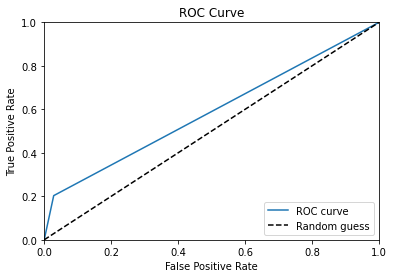

In [135]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.legend(loc="lower right")
plt.show()

### Conclusion

By analyzing the Adult Data Set and building a predictive model for income estimation, this project aims to contribute to our understanding of the factors that influence income levels. The insights gained from this analysis can have practical applications in areas such as financial planning, social policy, and economic research. Through this project, we will gain valuable experience in data preprocessing, exploratory data analysis, feature engineering, and model development, ultimately providing a valuable tool for predicting income based on demographic and socioeconomic attributes.

In [136]:
import pickle

In [137]:
with open('logreg.pkl', 'wb') as file:
    pickle.dump(logreg, file)